# Convolutional Neural Networks

A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for analyzing visual data. It's particularly well-suited for image recognition, classification, and even object detection.

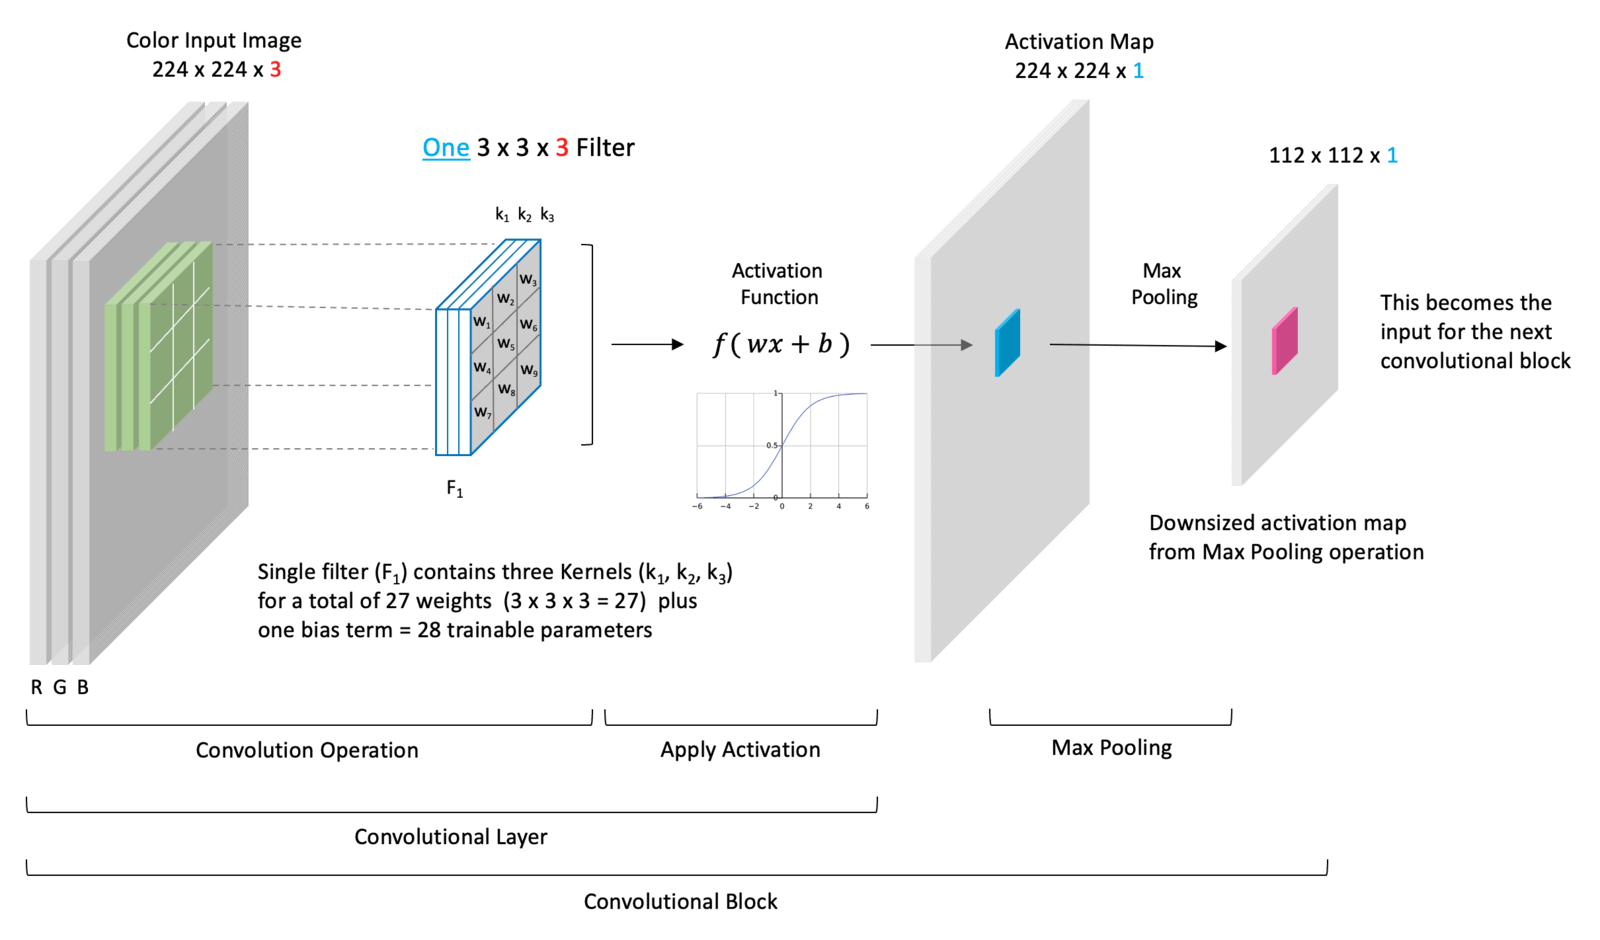

## working

### 1. Filters
Filters in Convolutional Neural Networks (CNNs) are the heart of the convolution process. They help in extracting features from the input images, such as edges, textures, and patterns. Here's a breakdown:

* What Are Filters?
Filters (or kernels) are small matrices that slide over the input data to perform the convolution operation. Each filter is trained to detect a specific feature.

* How They Work:
  * Initialization: Filters are initialized with random values.

  * Convolution Operation: The filter slides (convolves) over the input image and performs element-wise multiplication followed by a sum to produce a single value in the output feature map.

  * Feature Extraction: Multiple filters can detect different features like vertical or horizontal edges, corners, etc.

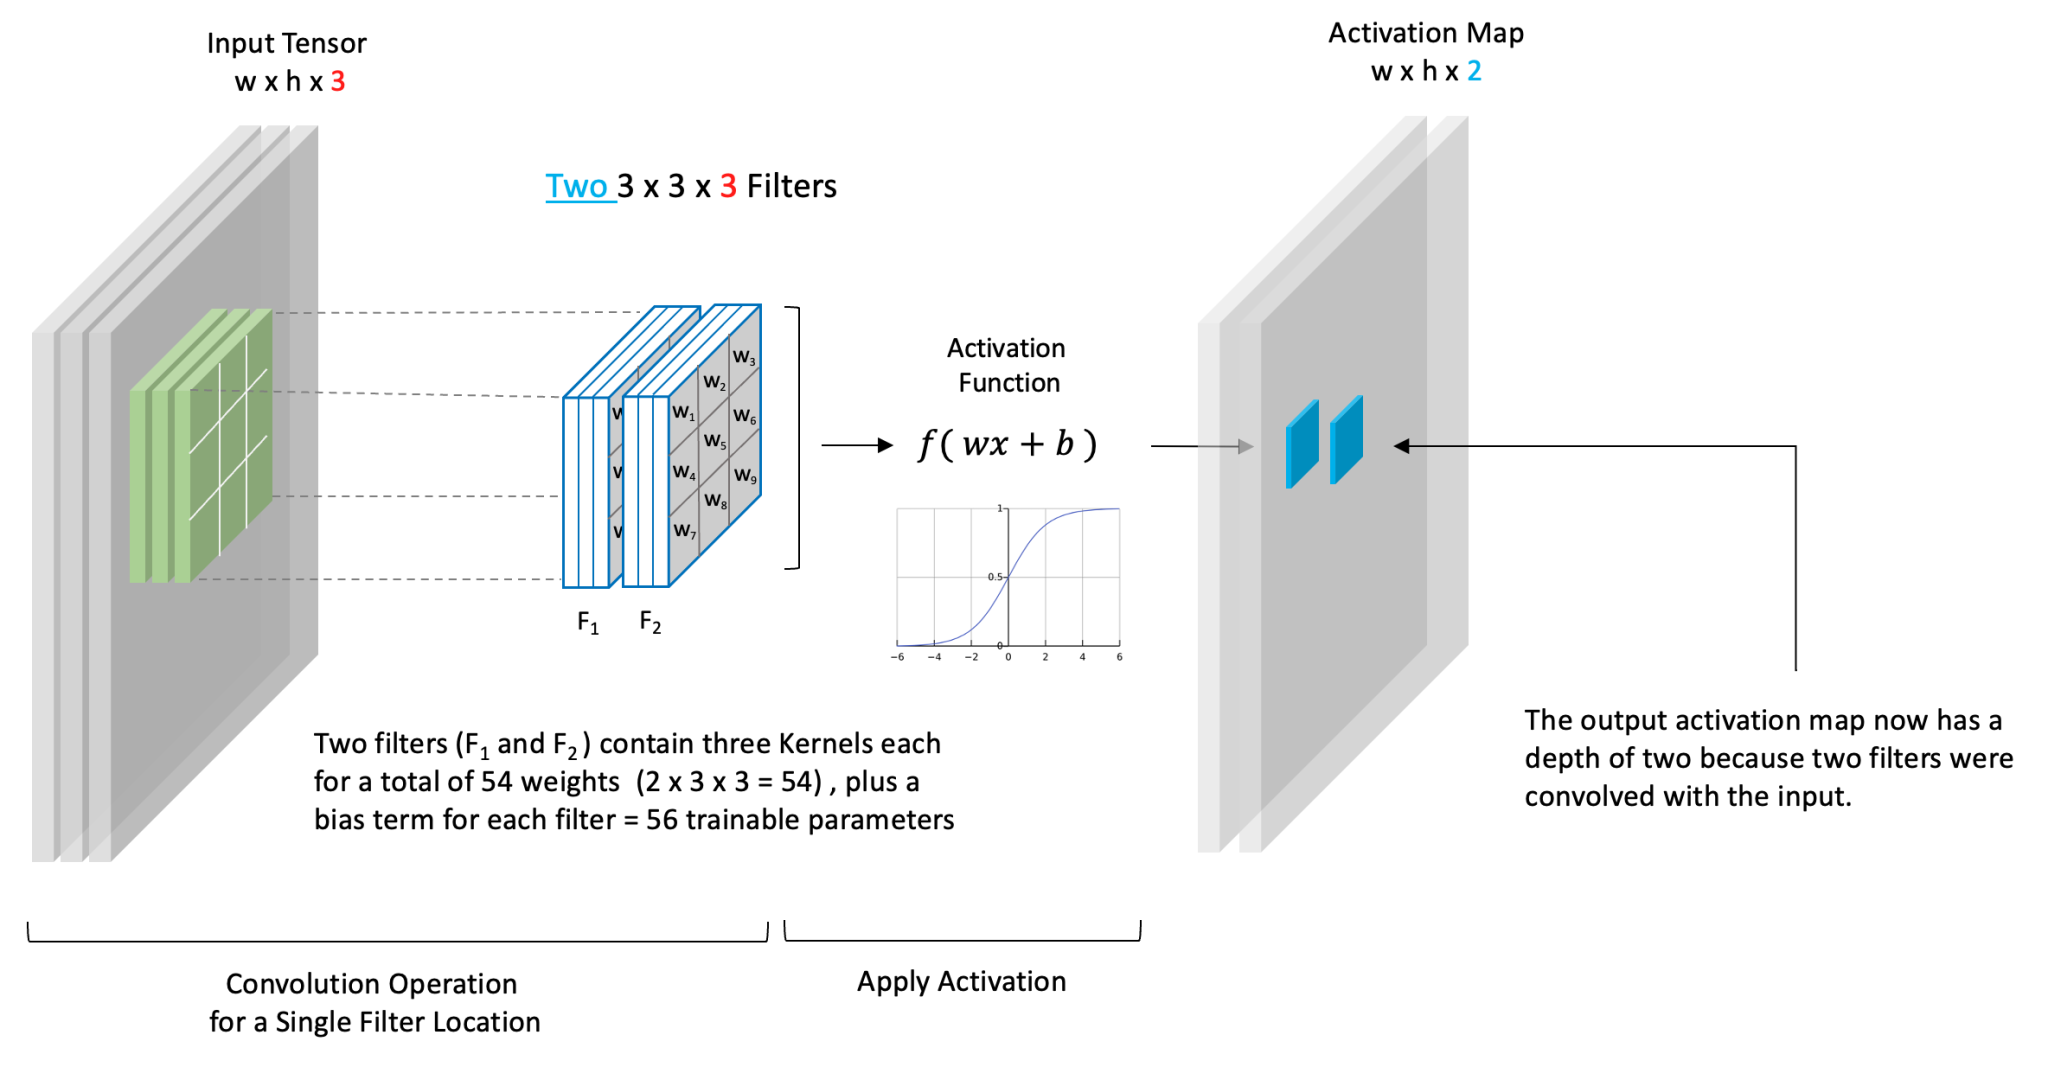

### 2. Padding

Padding in Convolutional Neural Networks (CNNs) is a technique used to maintain the spatial dimensions (height and width) of an input image after the convolution operation. It helps control the output size and ensure that important features at the edges of the image are not lost


e.g input image [8X8] * filters [3X3] = output activation map [8X8]

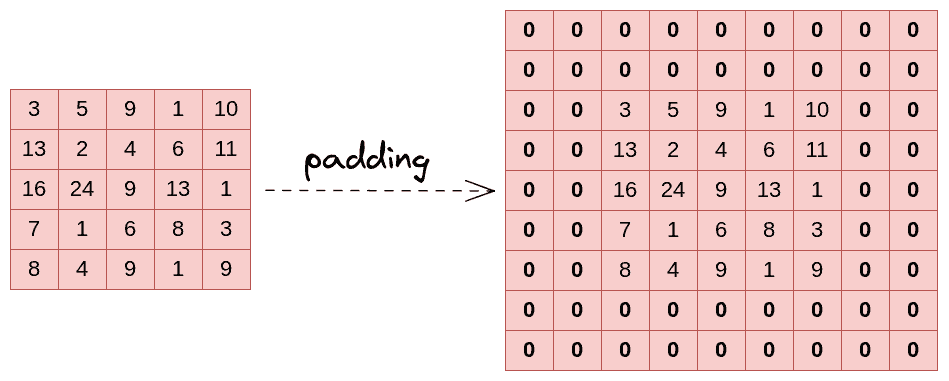

**Types of Padding**

You
what is padding in cnn
Copilot
Padding in Convolutional Neural Networks (CNNs) is a technique used to maintain the spatial dimensions (height and width) of an input image after the convolution operation. It helps control the output size and ensure that important features at the edges of the image are not lost. Here’s a quick rundown:

Types of Padding:

1. Valid Padding (no padding):

  * No extra pixels are added around the input.

  * The output size is smaller than the input size.

  * Formula:
Output size = Input size − Kernel size + 1.

2. Same Padding (zero padding):

  * Zeros are added around the input image.

  * The output size is the same as the input size.

  * Ensures that the output feature map has the same spatial dimensions as the input.

  * Formula:
Output size = Input size .

### 3. max pooling


Max pooling is a down-sampling technique used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions (height and width) of the input volume, which helps to decrease the computational load, memory usage, and number of parameters. It also helps to make the feature detection process more robust by summarizing the presence of features in patches of the feature map.

* How It Works:
  * Partition the Input Image: The input image is partitioned into a set of non-overlapping rectangles.

  * Max Selection: For each patch, the maximum value is selected and used as the representative value for that region.

  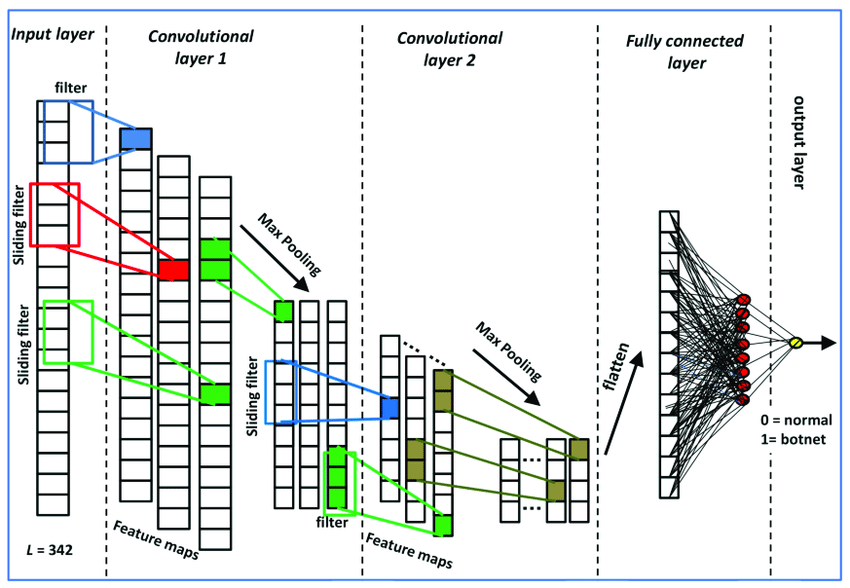

--------------------------------------------------------------------







--------------------------------------------------------------------

# Implementations

In [2]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [3]:
import keras
import keras_tuner
import tensorflow as tf

## dataset

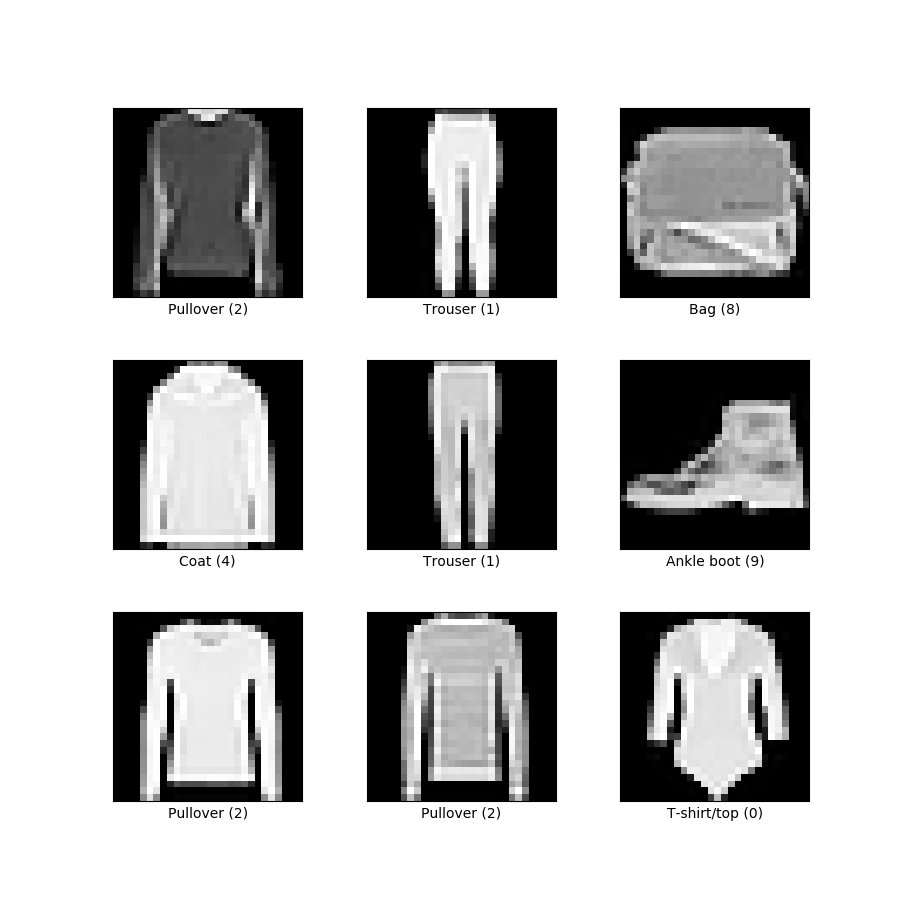

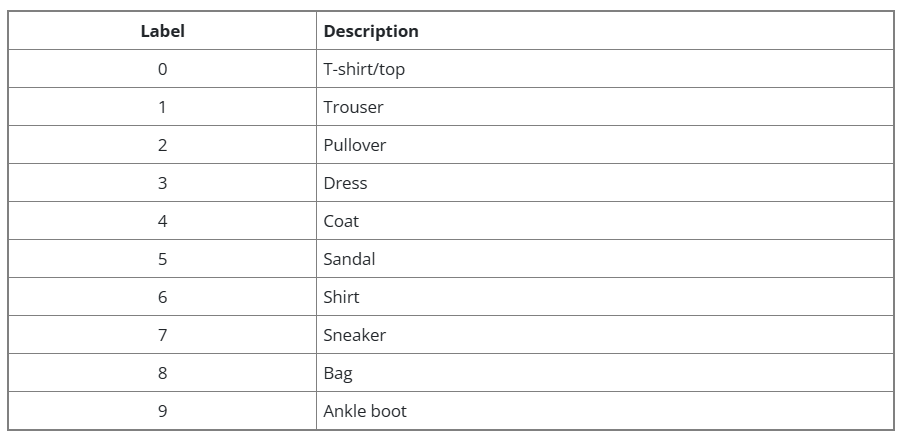

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_image,train_label),(test_image,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# scaling down image
train_image = train_image/255.0
test_image = test_image/255.0

In [7]:
train_image[0].shape

(28, 28)

In [8]:
# reshaping the images
train_image = train_image.reshape(len(train_image),28,28,1)
test_image = test_image.reshape(len(test_image),28,28,1)

In [9]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(filters=hp.Int("conv_1_filter",min_value=64,max_value=128,step=16),
                          kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
                          activation="relu",
                          input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(filters=hp.Int("conv_2_filter",min_value=64,max_value=128,step=16),
                          kernel_size=hp.Choice("conv_2_kernel",values=[3,5]),
                          activation="relu"
    ),

      keras.layers.Flatten(),
      keras.layers.Dense(
          units=hp.Int("dense_1_unit",min_value=64,max_value=128,step=16),
          activation="relu"
      ),
      keras.layers.Dense(10,activation="softmax")
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate",values=[1e-1,1e-2,1e-3])),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"],
                )
  return model

In [10]:
from keras_tuner import RandomSearch

In [11]:
tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    directory = "hyperparameter_tuning",
    project_name = "mnist"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
tuner.search(train_image,train_label,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.8669999837875366

Best val_accuracy So Far: 0.8703333139419556
Total elapsed time: 00h 04m 32s


In [13]:
model = tuner.get_best_models(num_models=1)[0]


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 112)         │           2,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 112)         │         113,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 54208)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 112)                 │       6,071,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,188,458 (23.61 MB)

 Trainable params: 6,188,458 (23.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(train_image,train_label,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8826 - loss: 0.3167 - val_accuracy: 0.8608 - val_loss: 0.3991
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8946 - loss: 0.2908 - val_accuracy: 0.8673 - val_loss: 0.4074
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8973 - loss: 0.2820 - val_accuracy: 0.8667 - val_loss: 0.3953
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9026 - loss: 0.2715 - val_accuracy: 0.8802 - val_loss: 0.4133
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9101 - loss: 0.2498 - val_accuracy: 0.8723 - val_loss: 0.4202
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9123 - loss: 0.2403 - val_accuracy: 0.8672 - val_loss: 0.4670
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9165 - loss: 0.2297 - val_accuracy: 0.8632 - val_loss: 0.4935
